
# Data Cleaning - Part 02

Let's clean a new dataset. We'll look for missing values and outliers, as well as perform some manipulations.
It should be in the checklist of things TO DO in every project we start. 

## What to analyze? 

First we should understand if the data we're getting is in the best shape, and that we can indeed perform analysis using this data or if we should perform changes beforehand. We should perform some basic checks. 

- Type of data
    - Dates are formatted properly as *datetime*, numerical data such as monetary values are *float* types.
- Data range
    - Months go from 1 to 12, days from 1 to 31, etc.
- Mandatory data
    - Is it the case that, for the dataset, certain columns shouldn't be empty or with missing values?
- Unique data
    - IDs, reference numbers, any code that should be unique. 
- Categorical data
    - Check if categories are named correctly (male, Male, MALe are all the same but by being input differently they may cause some issues) and if they make sense. 
- Regular patterns
    - Phone numbers, for example, follow a regular pattern for the country or region. 
    - IDs or other codes may have a set number of characters including numbers and textual characters. 
- Validity between data fields
    - Check if data is valid between columns or rows. For instance, date in which order was delivered is not before date in which it was placed. 

In [638]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization config
sns.set_style()
%matplotlib inline

# Importing data
df = pd.read_csv("./violencia_rio.csv",sep=',')

In [639]:
df

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,...,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,...,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,...,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,...,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2


In [640]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [641]:
# Checking size of dataset
df.shape

(344, 56)

## Analyzing data types, relevance and integrity

Note that there's some data that has a type *float* when it shouldn't, like number of homicides by police intervention.
However, if we try to change the whole column type to *int64* we will get an error, because there are missing values. 

In [642]:
# Changing data type fails if there are missing values
# df.hom_por_interv_policial.astype('int64')

## Handling missing values

First we have to find out which type of data is missing, and their proportion in relation to the whole dataset. If only a few rows are missing, then they have little impact on the analysis. If there are many rows missing, we may have to think about ways of filling in missing data, while being mindful of how much we're biasing the data. 


In [643]:
df.isnull().sum().sort_values(ascending=False)

furto_bicicleta               276
roubo_bicicleta               276
cmba                          180
posse_drogas                  180
trafico_drogas                180
apreensao_drogas_sem_autor    180
apf                           180
aaapai                        180
cmp                           180
furto_celular                 144
sequestro_relampago           144
extorsao                      144
furto_coletivo                144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estelionato                   144
pol_militares_mortos_serv     144
pol_civis_mortos_serv         144
estupro                       144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
registro_ocorrencias           96
lesao_corp_morte               96
sequestro                      96
ameaca                         96
lesao_corp_culposa             96
hom_culposo                    84
hom_por_interv

In [644]:
df.set_index('vano').isna().groupby(by='vano',level=0).sum()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,
1991,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1992,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1993,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1994,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1995,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1996,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1997,0,0,12,0,12,0,0,12,12,12,...,12,0,12,12,12,0,0,0,12,0
1998,0,0,12,0,0,0,0,12,0,12,...,12,0,12,12,12,0,0,0,12,0
1999,0,0,0,0,0,0,0,12,0,0,...,12,0,12,12,12,0,0,0,0,0


From this output we can see how many missing values we have per year, for each of the categories. Some data started being recorded in 1998, while others in 2002. This means we need to understand the cutoff points we can use when cleaning the data. Starting from around 2013, all data seems to be available, meaning that we have 6 years worth of complete data to analyze.

## Airbnb dataset

To get used to the routine of identifying missing values, let's try another dataset.

In [645]:
df_airbnb = pd.read_csv("./nyc.csv", index_col=0)
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.857220,-73.937900,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.747670,-73.975000,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.686880,-73.955960,Private room,60,29,50,2019-12-02,0.37,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49525,43702714,Spacious and Luxurious Noho 3 Bedroom Apartment,18880232,Byron,Manhattan,East Village,40.729553,-73.990712,Entire home/apt,173,3,0,NaN,NaN,1,365
49526,43702765,2-bedroom entire place for you in Bushwick,804056,Philip,Brooklyn,Bushwick,40.697820,-73.913960,Entire home/apt,99,3,0,NaN,NaN,1,135
49527,43703128,"Simple Spacious Manhattan Room for 2Near 2,3 T...",137358866,Kaz,Manhattan,Harlem,40.812614,-73.942075,Private room,49,28,0,NaN,NaN,160,8
49528,43703156,Cosy Room Available in East Village,26846438,Marine,Manhattan,Civic Center,40.713753,-74.005350,Private room,94,2,0,NaN,NaN,1,12


In [646]:
# Basic info on the dataset
print(f"Data has {df_airbnb.shape[0]} rows and {df_airbnb.shape[1]} columns")

Data has 49530 rows and 16 columns


In [647]:
df_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [648]:
df_airbnb.isnull().sum().sort_values(ascending=False)

last_review                       11319
reviews_per_month                 11319
name                                 18
host_name                             6
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Check if the column has any relevance to analysis (i.e. if it has predictive power). If the column has a lot of missing values and low predictive power, we can safely remove it. If the column has many missing values but should be used in the analysis, we should find ways to replace these missing values, with the median, for example, or with the mode. Lastly, if the column has only a few missing values, we should study whether removing these rows is possible and that it will not negatively impact the analysis (most likely the case if we're talking about few rows in proportion to the whole dataset).


In [649]:
df_airbnb = df_airbnb.drop(columns=['reviews_per_month' , 'last_review'])
df_airbnb.isnull().sum().sort_values(ascending=False)

name                              18
host_name                          6
id                                 0
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [650]:
df_airbnb.dropna(axis=0, inplace=True)
df_airbnb.isnull().sum().sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [651]:
df_airbnb.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,49506.0,49506.0,49506.0,49506.0,49506.0,49506.0,49506.0,49506.0,49506.0
mean,22965296.4,85118900.5,40.7,-74.0,162.7,8.2,23.9,6.2,126.7
std,13525679.1,98890478.7,0.1,0.0,419.4,21.5,48.3,25.5,142.4
min,2060.0,2259.0,40.5,-74.2,0.0,1.0,0.0,1.0,0.0
25%,10875806.0,9268318.2,40.7,-74.0,68.0,2.0,1.0,1.0,0.0
50%,22338936.0,38016083.0,40.7,-74.0,101.0,3.0,5.0,1.0,79.0
75%,35578705.0,137358866.0,40.8,-73.9,175.0,6.0,23.0,2.0,267.0
max,43703359.0,349082641.0,40.9,-73.7,10000.0,1250.0,746.0,280.0,365.0


## Spotting outliers

Looking at the output we can get a hint about wether there are outliers we should remove.
A value of 1250 nights at the *minimum_nights* is likely a mistake when entering the data. 
The median price is $101,00 and the 75 percentile is still $175,00, but the maximum is $10.000,00, indicating there may be outliers.  

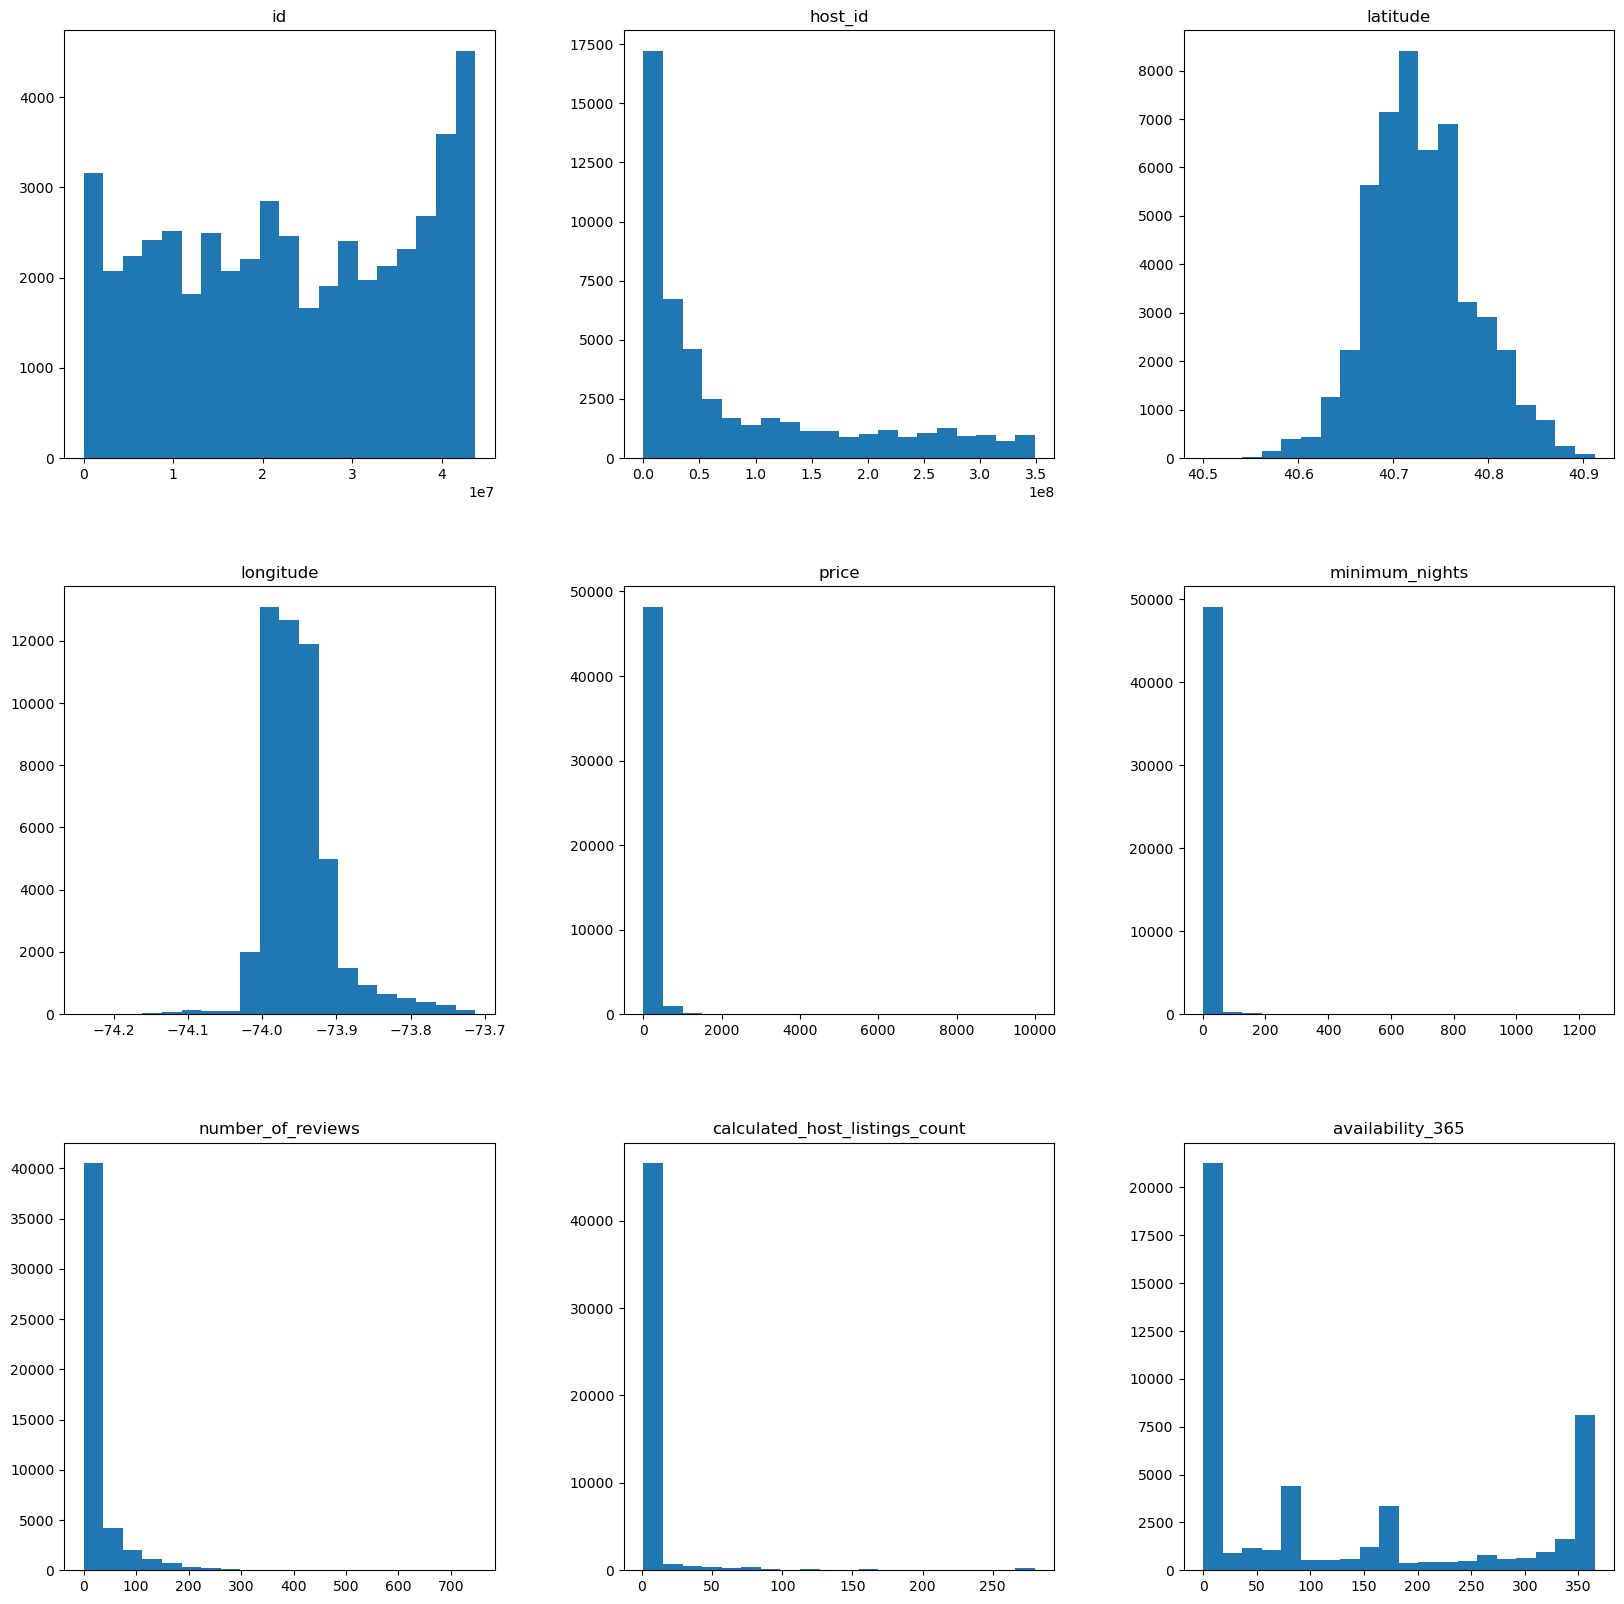

In [652]:
# Plotting histograms of numerical variables is a good way to get an idea about the distributions in the data. 
# Note the ";" at the end of the line, it removes the return from the hist() function. 
df_airbnb.hist(figsize=(20,20),bins=20,grid=False);

To get rid of the outliers we must remember that any values that are greater than **Q3 + 1,5 * IQR** and smaller than **Q1 - 1,5 * IQR** are to be considered outliers.
The steps to identify outliers are as follows:
- Define the quartiles Q3 and Q1.  
- Calculate the IQR (inter quartile range) for the variable, which is IQR = Q3 - Q1.
- Calculate the upper and lower limits using the formulas above. 

Then we can remove the outliers.

In [653]:
# Definining Q1, Q3 and IQR
price_q1 = df_airbnb.price.quantile(.25)
price_q3 = df_airbnb.price.quantile(.75)
price_iqr = price_q3 - price_q1

print(f"Quartile 1 (Q1) for the variable price is: {price_q1}\nQuartile 3 (Q3) for the variable price is: {price_q3}\nIQR for the variable price is: {price_iqr}")

Quartile 1 (Q1) for the variable price is: 68.0
Quartile 3 (Q3) for the variable price is: 175.0
IQR for the variable price is: 107.0


In [654]:
# Calculating limits
price_upper = price_q3 + price_iqr * 1.5
price_lower = price_q1 - price_iqr * 1.5
print(f"Prices greater than {price_upper} or smaller than {price_lower} are outliers and should be removed from the dataset.")

Prices greater than 335.5 or smaller than -92.5 are outliers and should be removed from the dataset.


Dataset has 49506 columns
The price variable has 2913 values above upper limit of $335.50
These values represent 5.88% of the data in the variable price


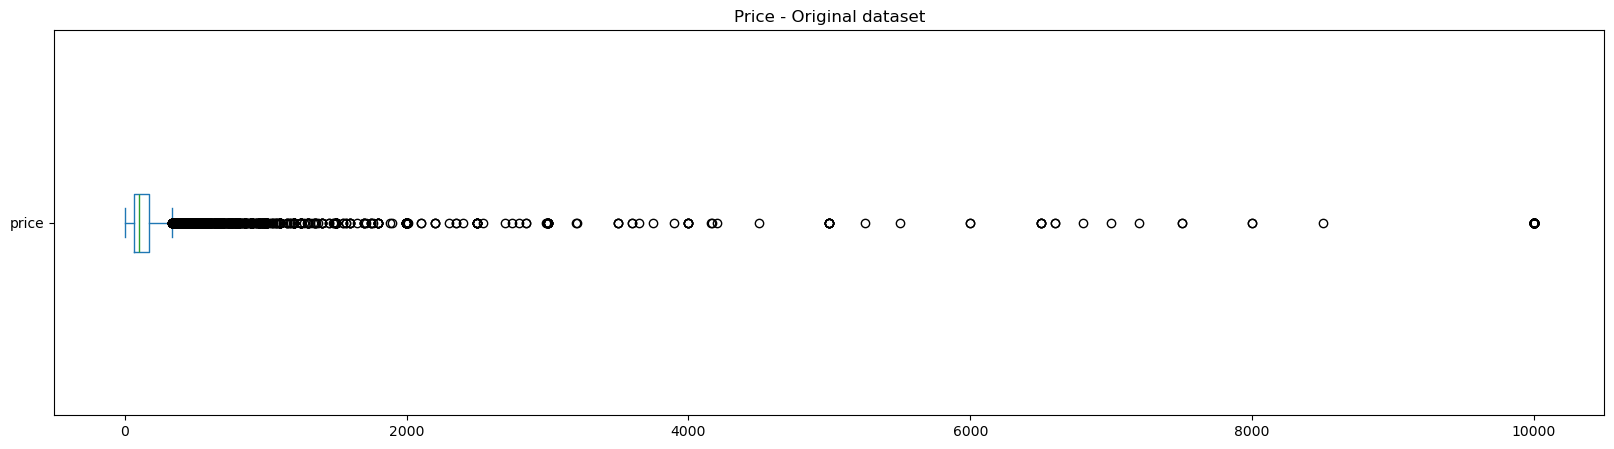

In [655]:
df_airbnb.price.plot(kind='box',
                           vert=False,
                           figsize=(20,5),
                           title="Price - Original dataset")

print("Dataset has {} columns".format(df_airbnb.shape[0]))
print("The price variable has {} values above upper limit of ${:.2f}".format(len(df_airbnb[df_airbnb.price > price_upper]),price_upper))
print("These values represent {:.2f}% of the data in the variable price".format(
len(df_airbnb[df_airbnb.price > price_upper]) / df_airbnb.shape[0] * 100))

In [656]:
# Making a copy of the dataset that will be cleaned. It's good practice to clean a copy of the original dataset so we can keep the original just in case.
df_airbnb_clean = df_airbnb.copy()

# Removing outliers and items with price set to $0,00 which are not relevant for the analysis. 
df_airbnb_clean.drop(df_airbnb_clean[df_airbnb_clean.price > price_upper].index, axis=0, inplace=True)
df_airbnb_clean.drop(df_airbnb_clean[df_airbnb_clean.price == 0].index, axis=0, inplace=True)

print("Before cleaning: {}".format(df_airbnb.shape[0]))
print(f"After cleaning {df_airbnb_clean.shape[0]}")

Before cleaning: 49506
After cleaning 46567


Dataset has 46567 columns
The price variable has 0 values above upper limit of $335.50
These values represent 0.00% of the data in the variable price


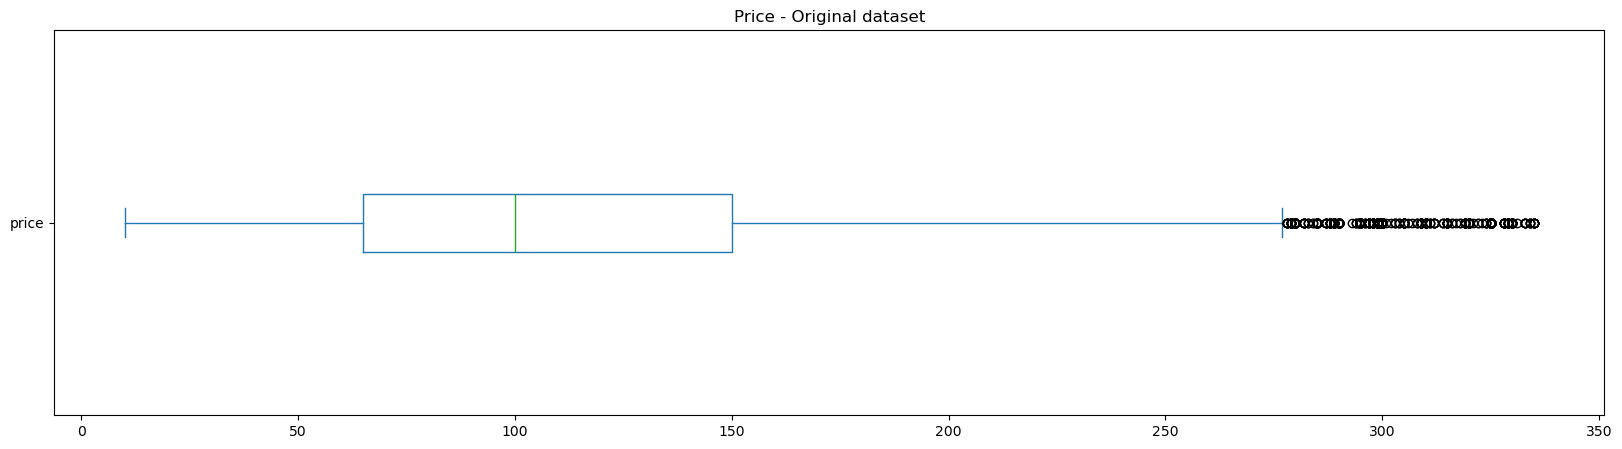

In [657]:
df_airbnb_clean.price.plot(kind='box',
                           vert=False,
                           figsize=(20,5),
                           title="Price - Original dataset")

print("Dataset has {} columns".format(df_airbnb_clean.shape[0]))
print("The price variable has {} values above upper limit of ${:.2f}".format(len(df_airbnb_clean[df_airbnb_clean.price > price_upper]),price_upper))
print("These values represent {:.2f}% of the data in the variable price".format(
len(df_airbnb_clean[df_airbnb_clean.price > price_upper]) / df_airbnb_clean.shape[0] * 100))

The new box plot refers to the clean, with outliers in relation to the new dataset. Check back on the output print above the plot: there are **no values above upper limit of $333,50**

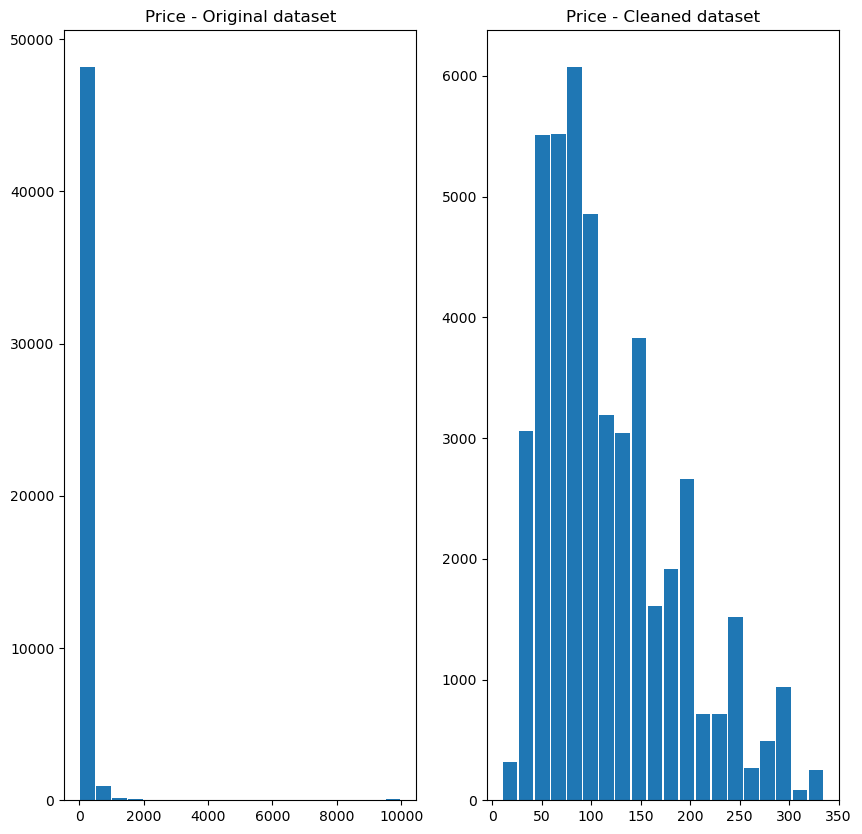

In [658]:
fig,axes= plt.subplots(nrows=1, ncols=2,figsize=(10,10))

# Plotting the price variable side by side so we can compare before and after cleaning.
axes[0].set_title("Price - Original dataset")
df_airbnb.price.hist(ax=axes[0],grid=False,bins=20,rwidth=0.9);
axes[1].set_title("Price - Cleaned dataset")
df_airbnb_clean.price.hist(ax=axes[1],grid=False,bins=20,rwidth=0.9);


In [659]:
df_airbnb_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,46567.0,46567.0,46567.0,46567.0,46567.0,46567.0,46567.0,46567.0,46567.0
mean,22837079.1,83749219.3,40.7,-73.9,117.8,8.1,24.5,6.3,124.0
std,13470633.1,97876253.1,0.1,0.0,67.0,21.3,49.1,25.7,141.5
min,2060.0,2259.0,40.5,-74.2,10.0,1.0,0.0,1.0,0.0
25%,10811136.0,9213842.5,40.7,-74.0,65.0,2.0,1.0,1.0,0.0
50%,22205622.0,37401126.0,40.7,-74.0,100.0,3.0,5.0,1.0,71.0
75%,35375891.0,135280693.0,40.8,-73.9,150.0,6.0,24.0,2.0,256.0
max,43703359.0,349082641.0,40.9,-73.7,335.0,1250.0,746.0,280.0,365.0


Note that, for the price variable, the maximum value is much closer to the 75th percentile value, which makes more sense than a value of $10.000,00. The standard deviation is much lower than before, and the mean is also lower. Meanwhile the median is almost the same. This means that we have effectively removed outliers in the price data. 

In [660]:
# Median is not being affected by the cleaning, but the mean has changed. This means that we have correctly removed the outliers.
print(f"Mean of original price data: {df_airbnb.price.mean().round(1)}.\nMean after cleaning: {df_airbnb_clean.price.mean().round(1)}")
print(f"Median of original price data: {df_airbnb.price.median()}.\nMedian after cleaning: {df_airbnb_clean.price.median()}")
print(f"Standard deviation in the original price data: {round(df_airbnb.price.std(),2)}\nStandard deviation after cleaning: {round(df_airbnb_clean.price.std(),2)}")


Mean of original price data: 162.7.
Mean after cleaning: 117.8
Median of original price data: 101.0.
Median after cleaning: 100.0
Standard deviation in the original price data: 419.41
Standard deviation after cleaning: 66.99


## Key takeaways

- Check the data and make some plots to get a better understanding of its distribution, and if there are outliers. 
- Remove or replace missing entries, and remove outliers. 
- Check if cleaning the dataset hasn't negatively impacted future analysis possibilities. 

## Notes

- Linear models are more sensitive to outliers, such as regression models. 
- Decision tree based models are less sensitive to outliers. 
- There are other techniques for pre-processing data, such as normalization and standardization, that will help with dealing with outliers.